In [1]:
import pickle
import os
import matplotlib.pyplot as plt

In [2]:
models = [
    {
        "train_loss_steps_filename": "out/loss_GraphSAGE.pkl",
        "metrics_filename": "out/metrics_GraphSAGE.pkl",
        "label": "GraphSAGE",
    },
    {
        "train_loss_steps_filename": "out/loss_LightGCN.pkl",
        "metrics_filename": "out/metrics_LightGCN.pkl",
        "label": "LightGCN",
    },
]

/tmp/ipykernel_210469/3516046923.py:39: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


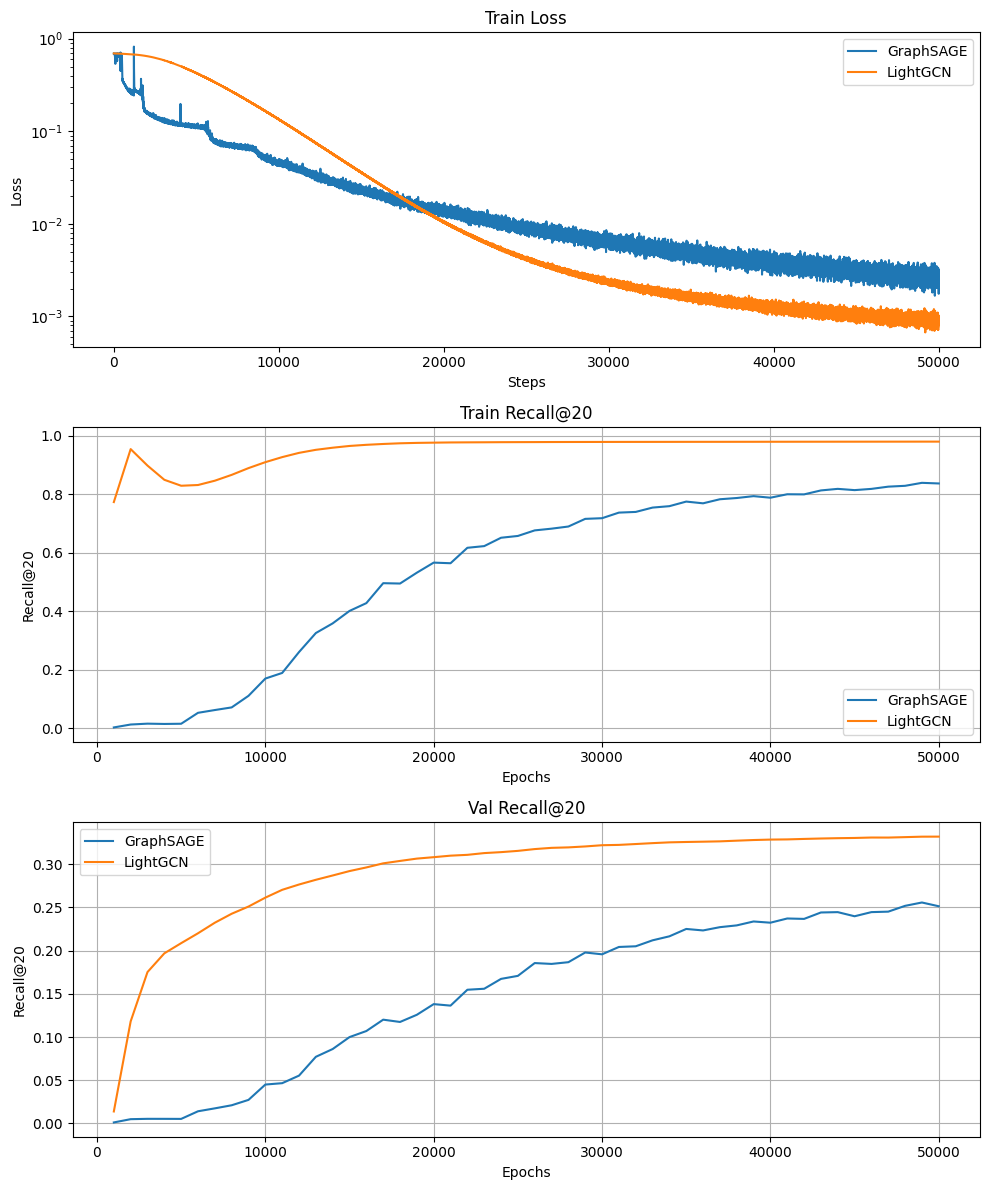

In [3]:
fig, ax = plt.subplots(3, 1, figsize=(10, 12))

for model in models:
    metrics_filename = model["metrics_filename"]
    train_loss_steps_filename = model["train_loss_steps_filename"]
    label = model["label"]

    # Load the files
    with open(os.path.join(metrics_filename), "rb") as f:
        metrics_file = pickle.load(f)

    with open(os.path.join(train_loss_steps_filename), "rb") as f:
        train_loss_steps_file = pickle.load(f)

    ax[0].plot(train_loss_steps_file, label=label)
    ax[1].plot(metrics_file["step"], metrics_file["train_recall20"], label=label)
    ax[2].plot(metrics_file["step"], metrics_file["val_recall20"], label=label)


ax[0].set_title("Train Loss")
ax[0].set_xlabel("Steps")
ax[0].set_ylabel("Loss")
ax[0].set_yscale("log")
ax[0].legend()

ax[1].set_title("Train Recall@20")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Recall@20")
ax[1].legend()
ax[1].grid(True)

ax[2].set_title("Val Recall@20")
ax[2].set_xlabel("Epochs")
ax[2].set_ylabel("Recall@20")
ax[2].legend()
ax[2].grid(True)

fig.tight_layout()
fig.show()
fig.savefig("model_comparison_plots.png", dpi=450)